# Installing and loading the Dataset

In [ ]:
!pip3 install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.7 MB/s eta 0:00:00


In [ ]:
!pip install -q spacy nltk

In [ ]:
!pip install keras

In [ ]:
from datasets import load_dataset

dataset = load_dataset("surrey-nlp/PLOD-CW")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

## Installing necessary packages and libraries

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss

In [ ]:
import spacy
import nltk
from nltk.stem.porter import PorterStemmer

nlp = spacy.load("en_core_web_sm")

stemmer = PorterStemmer()


# Create 3 different Dataframe for further Analysis

In [ ]:
df = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df_valid =pd.DataFrame(dataset['validation'])

## Flattening 3 different Dataframe

In [ ]:
#For df_Train
df['Tokens'] = df['tokens'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df['NER'] = df['ner_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

tokens = [token for sublist in df['Tokens'] for token in sublist]
ner_tags = [tag for sublist in df['NER'] for tag in sublist]

flat_df = pd.DataFrame({'Token': tokens, 'Ner_Tag': ner_tags})

In [ ]:
flat_df.head()

,Token,Ner_Tag
0,For,B-O
1,this,B-O
2,purpose,B-O
3,the,B-O
4,Gothenburg,B-LF


In [ ]:
#For df_test
df_test['Tokens'] = df_test['tokens'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_test['NER'] = df_test['ner_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

tokens_test = [token for sublist in df_test['Tokens'] for token in sublist]
ner_tags_test = [tag for sublist in df_test['NER'] for tag in sublist]

flat_df_test= pd.DataFrame({'Token': tokens_test, 'Ner_Tag': ner_tags_test})

In [ ]:
flat_df_test.head()

,Token,Ner_Tag
0,Abbreviations,B-O
1,:,B-O
2,GEMS,B-AC
3,",",B-O
4,Global,B-LF


In [ ]:
#For df_valid
df_valid['Tokens'] = df_valid['tokens'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df_valid['NER'] = df_valid['ner_tags'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

tokens_valid = [token for sublist in df_valid['Tokens'] for token in sublist]
ner_tags_valid = [tag for sublist in df_valid['NER'] for tag in sublist]

flat_df_valid= pd.DataFrame({'Token': tokens_valid, 'Ner_Tag': ner_tags_valid})

### **System 1: No  Preprocessing, FastText Vectorization, SVM**

In [ ]:
flat_df1=flat_df
flat_df1_test=flat_df_test
flat_df1_valid=flat_df_valid

In [ ]:
# Encode the ner_tags
label_encoder = LabelEncoder()
flat_df1['Encoded_Tag'] = label_encoder.fit_transform(flat_df1['Ner_Tag'])
flat_df1_test['Encoded_Tag'] = label_encoder.transform(flat_df1_test['Ner_Tag'])
flat_df1_valid['Encoded_Tag'] = label_encoder.transform(flat_df1_valid['Ner_Tag'])

In [ ]:
from gensim.models import FastText


tokens = [row.split() for row in flat_df1['Token']]  # Assuming each token is separated by a space

# FastText model
Fasttext_model= FastText(tokens, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
import numpy as np

def vectorize(token, model):
    return model.wv[token] if token in model.wv else np.zeros(model.vector_size)


X = np.array([vectorize(token, Fasttext_model) for token in flat_df1['Token']])
X_test =np.array([vectorize(token, Fasttext_model) for token in flat_df1_test['Token']])
X_valid =np.array([vectorize(token, Fasttext_model) for token in flat_df1_valid['Token']])

In [ ]:
svm_classifier = SVC(kernel='linear')

# Train the SVM model
svm_classifier.fit(X, flat_df1['Encoded_Tag'])


SVC(kernel='linear')

In [ ]:
y_test =flat_df1_test['Encoded_Tag']
y_valid =flat_df1_valid['Encoded_Tag']

In [ ]:

y_pred1 = svm_classifier.predict(X_test)


report = classification_report(y_test, y_pred1)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       270
           1       0.00      0.00      0.00       150
           2       0.86      1.00      0.92      4292
           3       0.00      0.00      0.00       288

    accuracy                           0.86      5000
   macro avg       0.21      0.25      0.23      5000
weighted avg       0.74      0.86      0.79      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1, average='macro'))
print("Recall:", recall_score(y_test, y_pred1, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred1, average='macro'))
print("Hamming Loss:", hamming_loss(y_test, y_pred1))

Accuracy: 0.8584
Precision: 0.2146
Recall: 0.25
F1 Score: 0.23095135600516575
Hamming Loss: 0.1416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


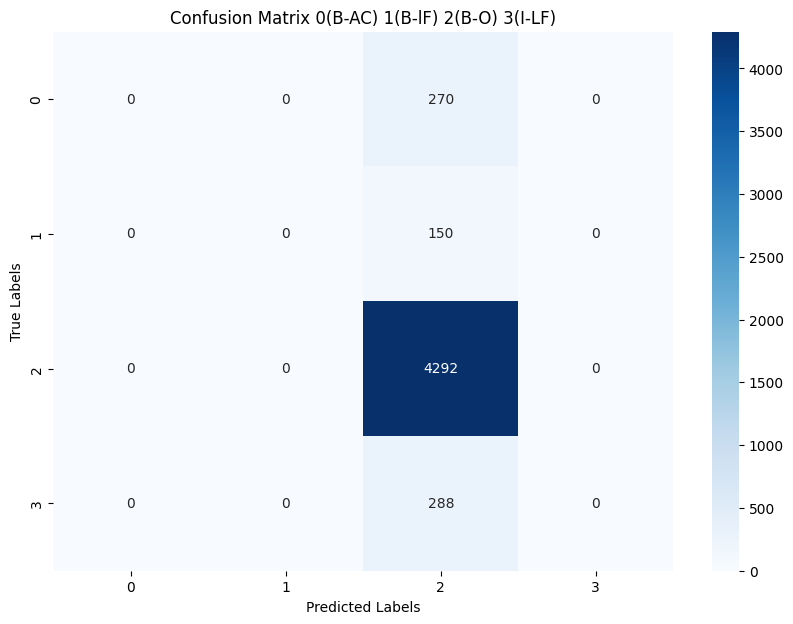

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix 0(B-AC) 1(B-lF) 2(B-O) 3(I-LF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

y_predv = svm_classifier.predict(X_valid)


report = classification_report(y_valid, y_predv)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       149
           2       0.85      1.00      0.92      4261
           3       0.00      0.00      0.00       327

    accuracy                           0.85      5000
   macro avg       0.21      0.25      0.23      5000
weighted avg       0.73      0.85      0.78      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy_score(y_valid, y_predv))
print("Precision:", precision_score(y_valid, y_predv, average='macro'))
print("Recall:", recall_score(y_valid, y_predv, average='macro'))
print("F1 Score:", f1_score(y_valid, y_predv, average='macro'))
print("Hamming Loss:", hamming_loss(y_valid, y_predv))

Accuracy: 0.8522
Precision: 0.21305
Recall: 0.25
F1 Score: 0.23005075045891374
Hamming Loss: 0.1478


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **System 2 No preprocessing , Encoding , LSTM**

In [ ]:
flat_df2=flat_df
flat_df2_test=flat_df_test
flat_df2_valid=flat_df_valid

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Initialize the Tokenizer and LabelEncoder
tokenizer = Tokenizer(lower=True, oov_token='UNK')
label_encoder = LabelEncoder()




In [ ]:
# Fit the tokenizer and label encoder on the training data
tokenizer.fit_on_texts(flat_df2['Token'])
label_encoder.fit(flat_df2['Ner_Tag'])

# Convert train and test data to sequences
X_train1 = tokenizer.texts_to_sequences(flat_df2['Token'])
X_test1 = tokenizer.texts_to_sequences(flat_df2_test['Token'])
X_valid1 = tokenizer.texts_to_sequences(flat_df_valid['Token'])

In [ ]:
X_trainp = pad_sequences(X_train1, maxlen=50, padding='post')
X_testp = pad_sequences(X_test1, maxlen=50, padding='post')
X_validp =pad_sequences(X_valid1, maxlen=50, padding='post')

y_train1 = label_encoder.transform(flat_df2['Ner_Tag'])
y_valid1 = label_encoder.transform(flat_df2_valid['Ner_Tag'])
y_test1 = label_encoder.transform(flat_df2_test['Ner_Tag'])

y_trainc = to_categorical(y_train1)
y_testc = to_categorical(y_test1)
y_validc = to_categorical(y_valid1)

In [ ]:
print(X_trainp)

[[   9    0    0 ...    0    0    0]
 [  31    0    0 ...    0    0    0]
 [3417    0    0 ...    0    0    0]
 ...
 [ 663    0    0 ...    0    0    0]
 [  17    0    0 ...    0    0    0]
 [ 207    0    0 ...    0    0    0]]


In [ ]:
print(y_trainc)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=50))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(y_trainc.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            515968    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 4)                 260       
                                                                 
Total params: 549252 (2.10 MB)
Trainable params: 549252 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_trainp, y_trainc, epochs=5, batch_size=20)

Epoch 1/5
2000/2000 [==============================] - 73s 35ms/step - loss: 0.6561 - accuracy: 0.8238
Epoch 2/5
2000/2000 [==============================] - 70s 35ms/step - loss: 0.6507 - accuracy: 0.8243
Epoch 3/5
2000/2000 [==============================] - 71s 35ms/step - loss: 0.6505 - accuracy: 0.8243
Epoch 4/5
2000/2000 [==============================] - 67s 34ms/step - loss: 0.6507 - accuracy: 0.8242
Epoch 5/5
2000/2000 [==============================] - 69s 35ms/step - loss: 0.6505 - accuracy: 0.8243


Testing

In [ ]:
y_predc= model.predict(X_testp)

157/157 [==============================] - 2s 11ms/step


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_testp, y_testc)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


157/157 [==============================] - 3s 16ms/step - loss: 0.5623 - accuracy: 0.8584
Test Loss: 0.5622535943984985
Test Accuracy: 0.8583999872207642


In [ ]:
y_predv= model.predict(X_validp)

157/157 [==============================] - 2s 11ms/step


In [ ]:
from numpy import argmax
y_pred = argmax(y_predc, axis=1)
y_true = argmax(y_testc, axis=1)
y_predv = argmax(y_predv, axis=1)

In [ ]:
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

        B-AC       0.00      0.00      0.00       270
        B-LF       0.00      0.00      0.00       150
         B-O       0.86      1.00      0.92      4292
        I-LF       0.00      0.00      0.00       288

    accuracy                           0.86      5000
   macro avg       0.21      0.25      0.23      5000
weighted avg       0.74      0.86      0.79      5000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall:", recall_score(y_true, y_pred, average='macro'))
print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
print("Hamming Loss:", hamming_loss(y_true, y_pred))

Accuracy: 0.8584
Precision: 0.2146
Recall: 0.25
F1 Score: 0.23095135600516575
Hamming Loss: 0.1416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


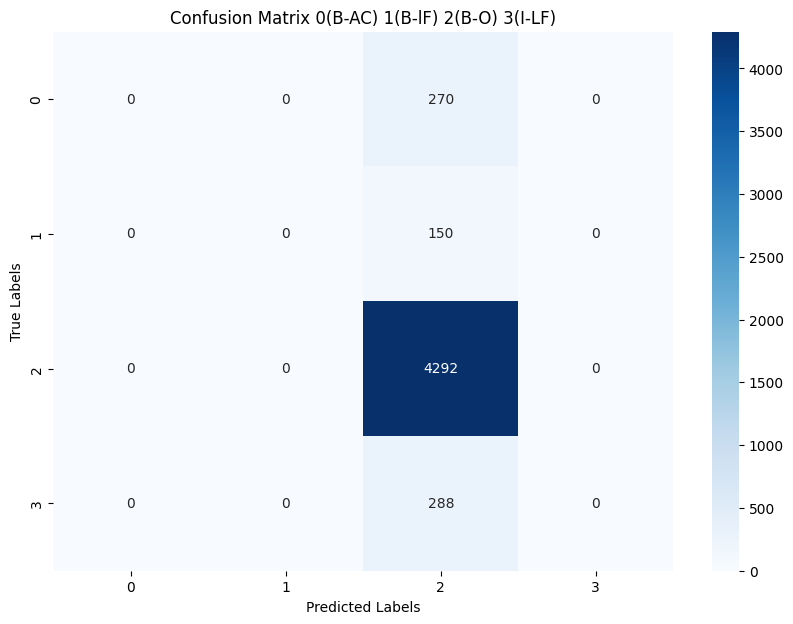

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix 0(B-AC) 1(B-lF) 2(B-O) 3(I-LF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Validation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
print("Accuracy:", accuracy_score(y_true, y_predv))
print("Precision:", precision_score(y_true, y_predv, average='macro'))
print("Recall:", recall_score(y_true, y_predv, average='macro'))
print("F1 Score:", f1_score(y_true, y_predv, average='macro'))
print("Hamming Loss:", hamming_loss(y_true, y_predv))

Accuracy: 0.8584
Precision: 0.2146
Recall: 0.25
F1 Score: 0.23095135600516575
Hamming Loss: 0.1416


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
